In [127]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib import pyplot as plt

## 1. (TEST) MNIST Data Processing

tensor([5]) torch.Size([1, 1, 28, 28])


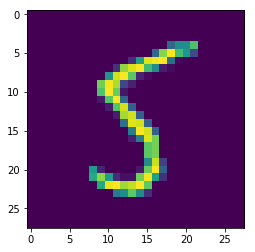

tensor([4]) torch.Size([1, 1, 28, 28])


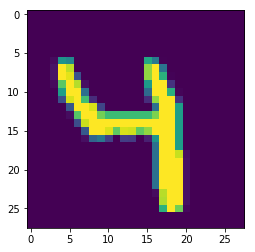

tensor([8]) torch.Size([1, 1, 28, 28])


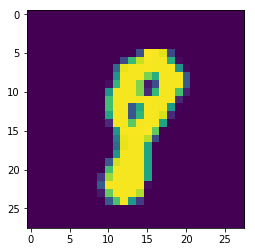

tensor([9]) torch.Size([1, 1, 28, 28])


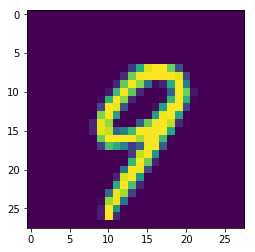

tensor([9]) torch.Size([1, 1, 28, 28])


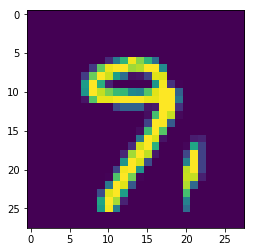

tensor([2]) torch.Size([1, 1, 28, 28])


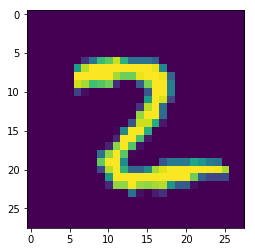

tensor([2]) torch.Size([1, 1, 28, 28])


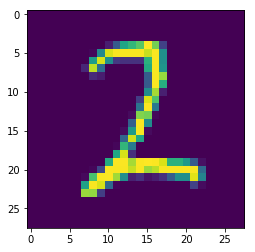

tensor([1]) torch.Size([1, 1, 28, 28])


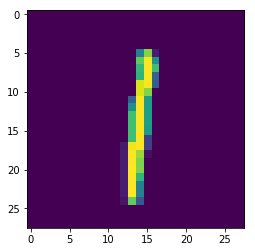

tensor([6]) torch.Size([1, 1, 28, 28])


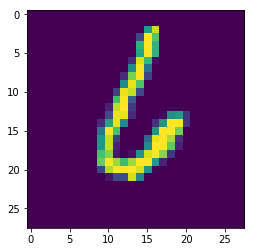

tensor([1]) torch.Size([1, 1, 28, 28])


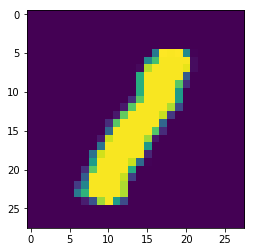

tensor([7]) torch.Size([1, 1, 28, 28])


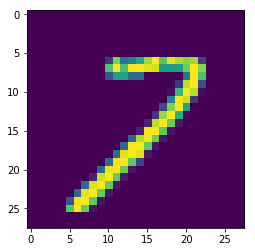

tensor([5]) torch.Size([1, 1, 28, 28])


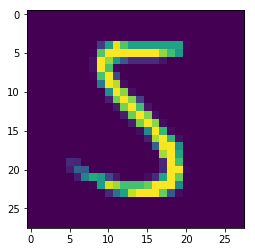

tensor([3]) torch.Size([1, 1, 28, 28])


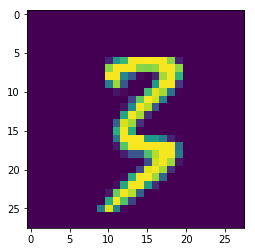

tensor([5]) torch.Size([1, 1, 28, 28])


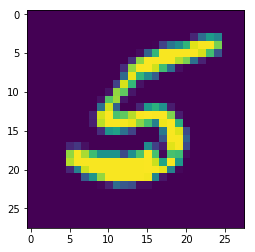

tensor([8]) torch.Size([1, 1, 28, 28])


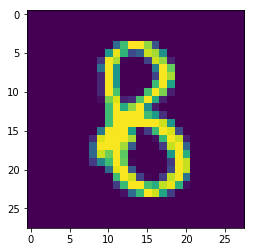

tensor([9]) torch.Size([1, 1, 28, 28])


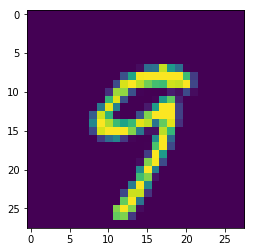

tensor([0]) torch.Size([1, 1, 28, 28])


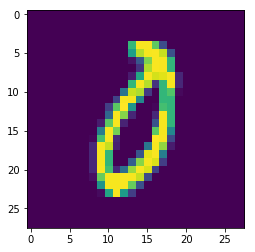

tensor([6]) torch.Size([1, 1, 28, 28])


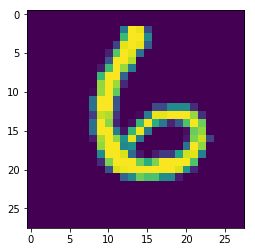

tensor([7]) torch.Size([1, 1, 28, 28])


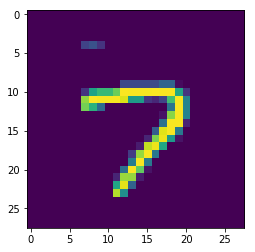

tensor([5]) torch.Size([1, 1, 28, 28])


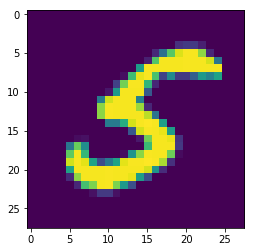

tensor([1]) torch.Size([1, 1, 28, 28])


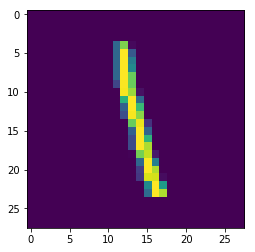

tensor([7]) torch.Size([1, 1, 28, 28])


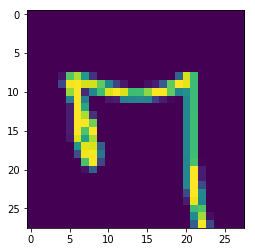

tensor([3]) torch.Size([1, 1, 28, 28])


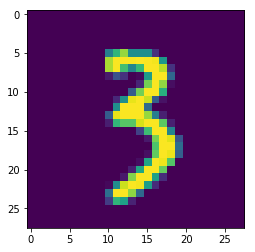

tensor([5]) torch.Size([1, 1, 28, 28])


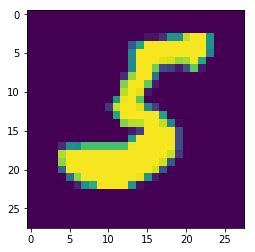

tensor([6]) torch.Size([1, 1, 28, 28])


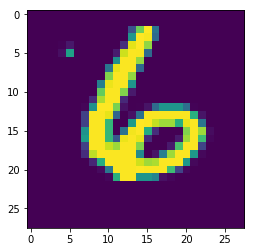

tensor([7]) torch.Size([1, 1, 28, 28])


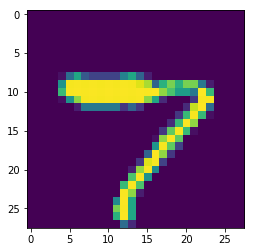

tensor([3]) torch.Size([1, 1, 28, 28])


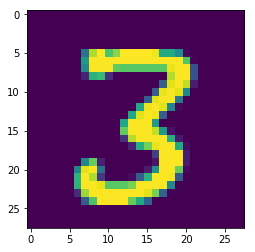

tensor([3]) torch.Size([1, 1, 28, 28])


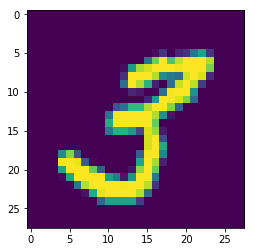

tensor([8]) torch.Size([1, 1, 28, 28])


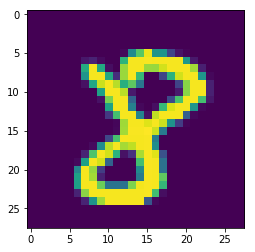

tensor([3]) torch.Size([1, 1, 28, 28])


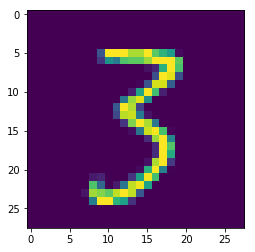

tensor([2]) torch.Size([1, 1, 28, 28])


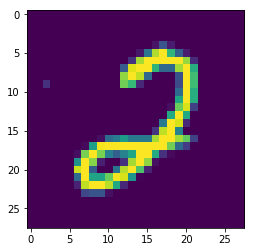

tensor([2]) torch.Size([1, 1, 28, 28])


KeyboardInterrupt: 

In [126]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a directory if not exists
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# MNIST dataset
dataset = torchvision.datasets.MNIST(root='../../data',
                                     train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)
# Data loader
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=1, 
                                          shuffle=True)


for i, x in enumerate(data_loader):
    print(x[1], x[0].size())
    fig = plt.figure()
    plt.imshow(x[0].view(28, 28))
    plt.show()


## 2. Variational Auto Encoder Model

In [128]:
# Hyper-parameters
image_size = 784
h_dim = 400
z_dim = 20
num_epochs = 10
batch_size = 128
learning_rate = 0.05

In [129]:
# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return torch.sigmoid(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [5, 9])


## 3. Training Section

Epoch[1/10], Step [1000/60000], Reconst Loss: 188.3195, KL Div: 33.5290
torch.Size([1, 784])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


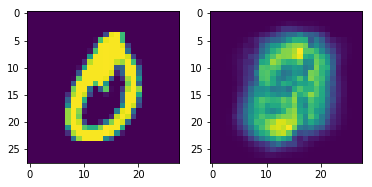

Epoch[1/10], Step [2000/60000], Reconst Loss: 248.1561, KL Div: 16.0696
torch.Size([1, 784])


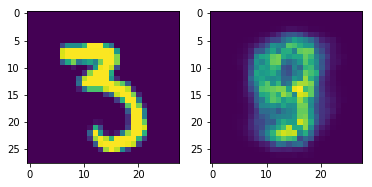

Epoch[1/10], Step [3000/60000], Reconst Loss: 229.1520, KL Div: 29.1281
torch.Size([1, 784])


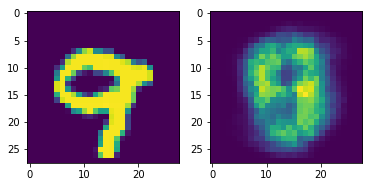

Epoch[1/10], Step [4000/60000], Reconst Loss: 215.6024, KL Div: 16.7801
torch.Size([1, 784])


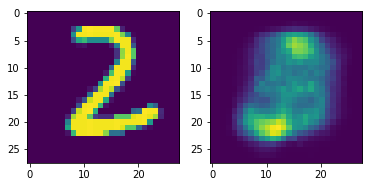

Epoch[1/10], Step [5000/60000], Reconst Loss: 190.6623, KL Div: 16.9876
torch.Size([1, 784])


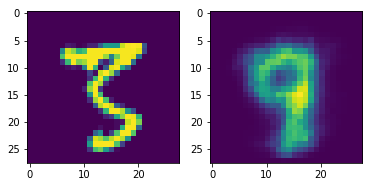

Epoch[1/10], Step [6000/60000], Reconst Loss: 122.7510, KL Div: 17.1844
torch.Size([1, 784])


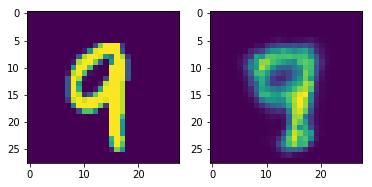

Epoch[1/10], Step [7000/60000], Reconst Loss: 182.4384, KL Div: 9.6327
torch.Size([1, 784])


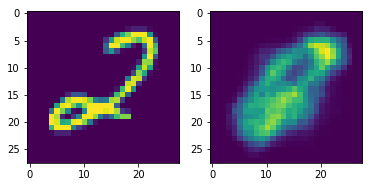

Epoch[1/10], Step [8000/60000], Reconst Loss: 181.2628, KL Div: 22.4526
torch.Size([1, 784])


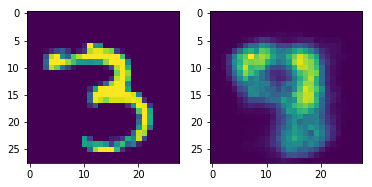

Epoch[1/10], Step [9000/60000], Reconst Loss: 183.5292, KL Div: 31.0919
torch.Size([1, 784])


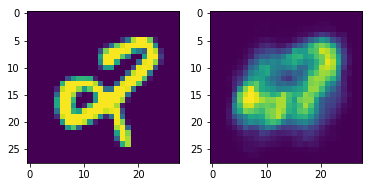

Epoch[1/10], Step [10000/60000], Reconst Loss: 209.0085, KL Div: 18.7925
torch.Size([1, 784])


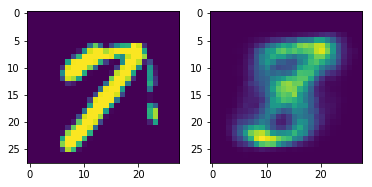

Epoch[1/10], Step [11000/60000], Reconst Loss: 109.1591, KL Div: 20.7187
torch.Size([1, 784])


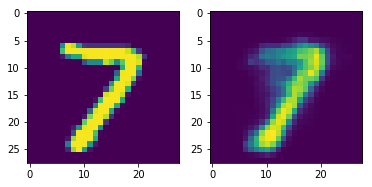

Epoch[1/10], Step [12000/60000], Reconst Loss: 99.0785, KL Div: 15.1946
torch.Size([1, 784])


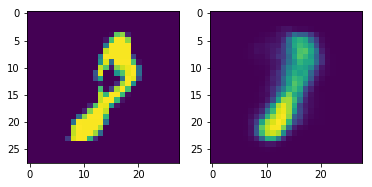

Epoch[1/10], Step [13000/60000], Reconst Loss: 160.5809, KL Div: 17.1408
torch.Size([1, 784])


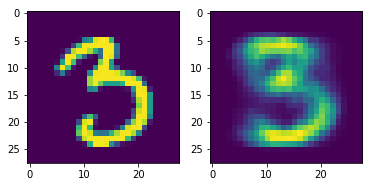

Epoch[1/10], Step [14000/60000], Reconst Loss: 141.7796, KL Div: 37.1794
torch.Size([1, 784])


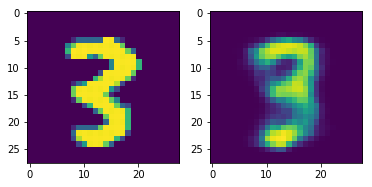

Epoch[1/10], Step [15000/60000], Reconst Loss: 119.3783, KL Div: 9.1487
torch.Size([1, 784])


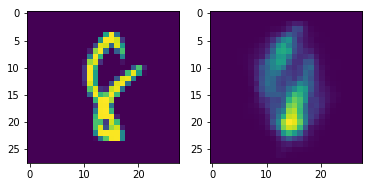

Epoch[1/10], Step [16000/60000], Reconst Loss: 41.4135, KL Div: 19.9862
torch.Size([1, 784])


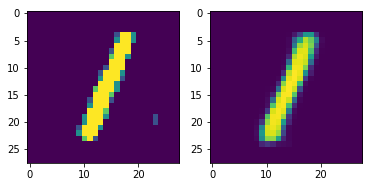

Epoch[1/10], Step [17000/60000], Reconst Loss: 134.4100, KL Div: 21.4242
torch.Size([1, 784])


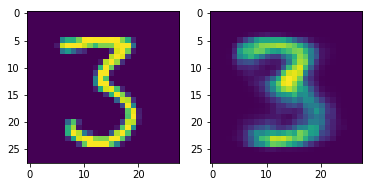

Epoch[1/10], Step [18000/60000], Reconst Loss: 178.2707, KL Div: 45.5388
torch.Size([1, 784])


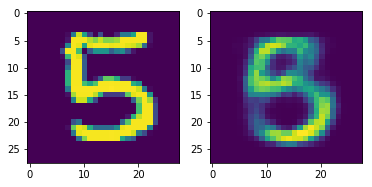

Epoch[1/10], Step [19000/60000], Reconst Loss: 48.4904, KL Div: 16.1598
torch.Size([1, 784])


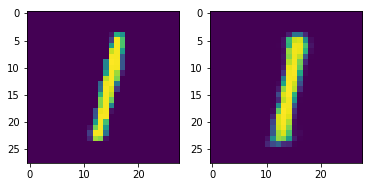

Epoch[1/10], Step [20000/60000], Reconst Loss: 124.4146, KL Div: 20.1579
torch.Size([1, 784])


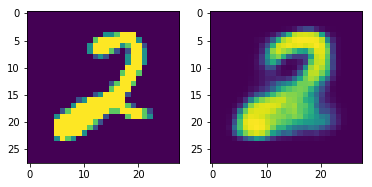

Epoch[1/10], Step [21000/60000], Reconst Loss: 137.2203, KL Div: 19.6702
torch.Size([1, 784])


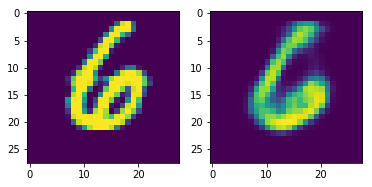

Epoch[1/10], Step [22000/60000], Reconst Loss: 171.6026, KL Div: 39.7065
torch.Size([1, 784])


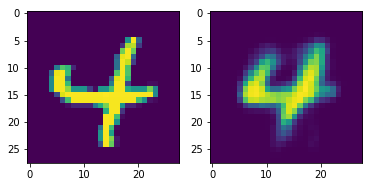

Epoch[1/10], Step [23000/60000], Reconst Loss: 74.5540, KL Div: 23.6858
torch.Size([1, 784])


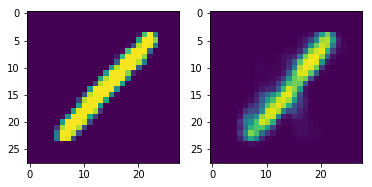

Epoch[1/10], Step [24000/60000], Reconst Loss: 108.4977, KL Div: 21.6782
torch.Size([1, 784])


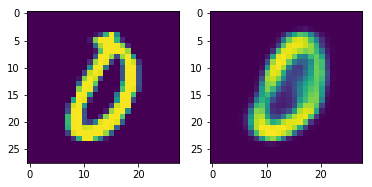

Epoch[1/10], Step [25000/60000], Reconst Loss: 139.2049, KL Div: 18.4120
torch.Size([1, 784])


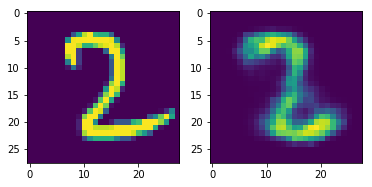

Epoch[1/10], Step [26000/60000], Reconst Loss: 143.8243, KL Div: 9.8401
torch.Size([1, 784])


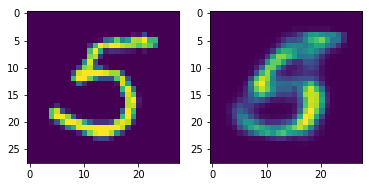

Epoch[1/10], Step [27000/60000], Reconst Loss: 84.3939, KL Div: 26.8868
torch.Size([1, 784])


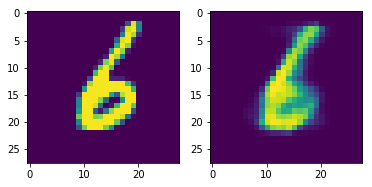

Epoch[1/10], Step [28000/60000], Reconst Loss: 96.7584, KL Div: 20.2204
torch.Size([1, 784])


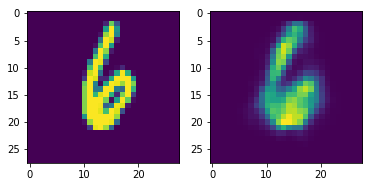

Epoch[1/10], Step [29000/60000], Reconst Loss: 142.8597, KL Div: 16.1426
torch.Size([1, 784])


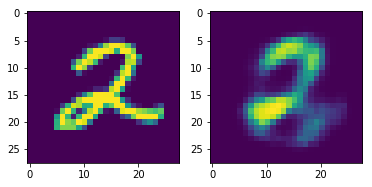

Epoch[1/10], Step [30000/60000], Reconst Loss: 61.1459, KL Div: 31.8165
torch.Size([1, 784])


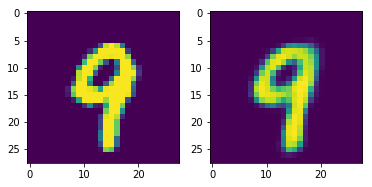

Epoch[1/10], Step [31000/60000], Reconst Loss: 107.3220, KL Div: 13.8250
torch.Size([1, 784])


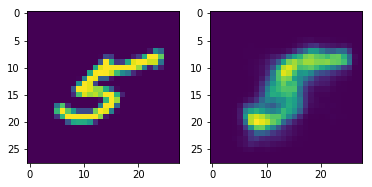

Epoch[1/10], Step [32000/60000], Reconst Loss: 105.4770, KL Div: 20.1581
torch.Size([1, 784])


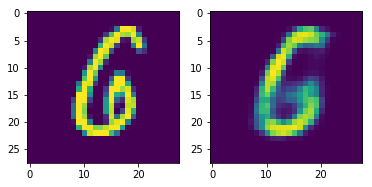

Epoch[1/10], Step [33000/60000], Reconst Loss: 110.6334, KL Div: 29.9407
torch.Size([1, 784])


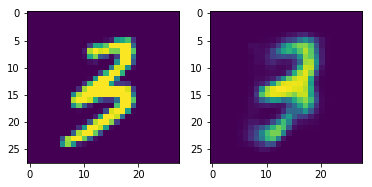

Epoch[1/10], Step [34000/60000], Reconst Loss: 98.8210, KL Div: 19.7331
torch.Size([1, 784])


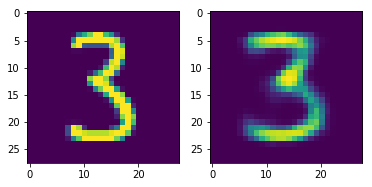

Epoch[1/10], Step [35000/60000], Reconst Loss: 83.5225, KL Div: 29.1978
torch.Size([1, 784])


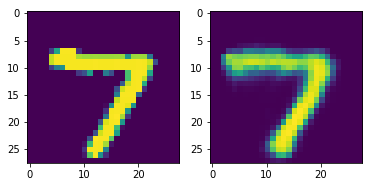

Epoch[1/10], Step [36000/60000], Reconst Loss: 100.7275, KL Div: 21.5068
torch.Size([1, 784])


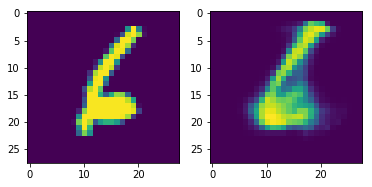

Epoch[1/10], Step [37000/60000], Reconst Loss: 115.6003, KL Div: 17.8433
torch.Size([1, 784])


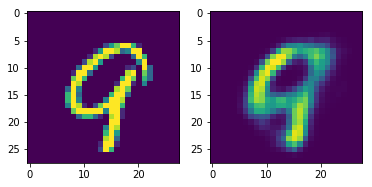

Epoch[1/10], Step [38000/60000], Reconst Loss: 89.4047, KL Div: 23.5419
torch.Size([1, 784])


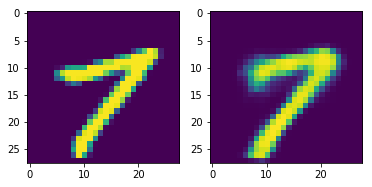

Epoch[1/10], Step [39000/60000], Reconst Loss: 93.3138, KL Div: 17.7770
torch.Size([1, 784])


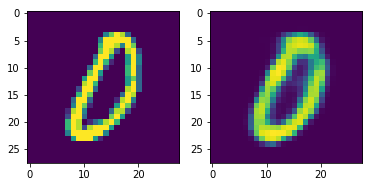

Epoch[1/10], Step [40000/60000], Reconst Loss: 83.0444, KL Div: 28.2428
torch.Size([1, 784])


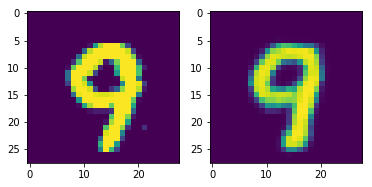

Epoch[1/10], Step [41000/60000], Reconst Loss: 49.3586, KL Div: 17.1762
torch.Size([1, 784])


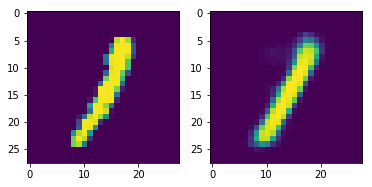

Epoch[1/10], Step [42000/60000], Reconst Loss: 42.8527, KL Div: 15.7480
torch.Size([1, 784])


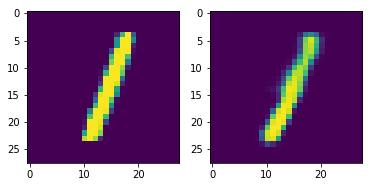

KeyboardInterrupt: 

In [130]:
# Start training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        
        ##### TODO: Change the LR Scheduler #####
        scheduler.step()
        
        # Forward
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        reconst_loss = F.binary_cross_entropy(x_reconst, x, reduction='sum')
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backward and optimization
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            ax1.imshow(x.view(28,28))
            ax2 = fig.add_subplot(122)
            output_img = torch.tensor(x_reconst.data)
            ax2.imshow(output_img.view(28,28))
            print(output_img.size())
            plt.show()
    
    with torch.no_grad():
        # Save the sampled images
        z = torch.randn(batch_size, z_dim).to(device)
        out = model.decode(z).view(-1, 1, 28, 28)
        save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

        # Save the reconstructed images
        out, _, _ = model(x)
        x_concat = torch.cat([x.view(-1, 1, 28, 28), out.view(-1, 1, 28, 28)], dim=3)
        save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))


### Exploding Gradient Problem
까진 아니어도 lr scheduler에 의해 lr이 너무 와리가리 하는 모습 - 최적화를 위해 MultiStepLR 실험 <br>
4/26 LR 스케줄러 MultiStepLR로 실험, loss 값 작게나마 감소함 -> 더 좋은 scheduler가 있을까. 이 모델에 맞는 scheduler를 찾아보자 <br>
5/9  main Model에 적용 완료

In [56]:
#Modifying learning rate with same optimizer and scheduler
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [5, 9])

/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/20], Step [100/469], Reconst Loss: 16400.9746, KL Div: 1335.4133


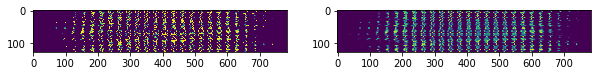

Epoch[1/20], Step [200/469], Reconst Loss: 16281.0908, KL Div: 1380.4548


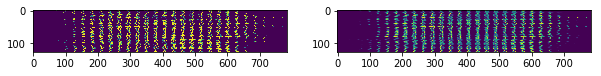

Epoch[1/20], Step [300/469], Reconst Loss: 14940.6973, KL Div: 1394.3285


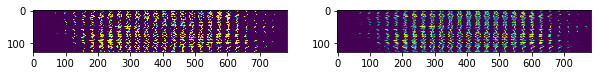

Epoch[1/20], Step [400/469], Reconst Loss: 16657.1719, KL Div: 1394.8907


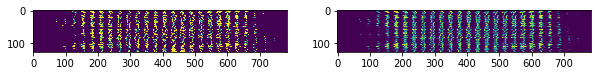

Epoch[2/20], Step [100/469], Reconst Loss: 16209.0068, KL Div: 1476.6631


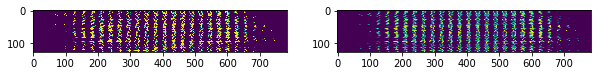

Epoch[2/20], Step [200/469], Reconst Loss: 16577.6582, KL Div: 1418.9945


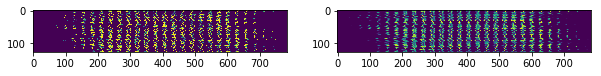

Epoch[2/20], Step [300/469], Reconst Loss: 16229.9023, KL Div: 1375.6177


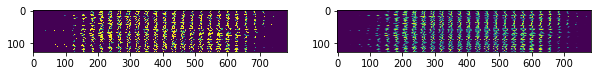

Epoch[2/20], Step [400/469], Reconst Loss: 16307.5869, KL Div: 1435.2578


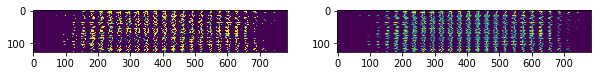

Epoch[3/20], Step [100/469], Reconst Loss: 15662.8828, KL Div: 1325.5818


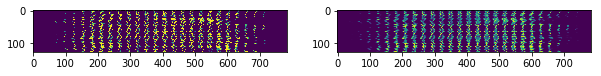

Epoch[3/20], Step [200/469], Reconst Loss: 16357.1787, KL Div: 1396.5212


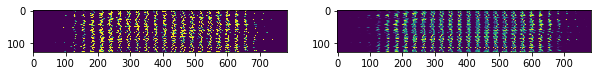

Epoch[3/20], Step [300/469], Reconst Loss: 16744.9766, KL Div: 1343.7266


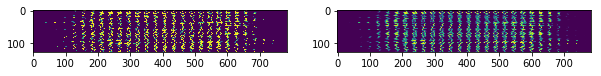

Epoch[3/20], Step [400/469], Reconst Loss: 15386.0312, KL Div: 1394.3610


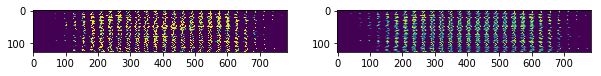

Epoch[4/20], Step [100/469], Reconst Loss: 14562.1123, KL Div: 1338.6042


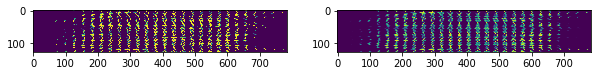

Epoch[4/20], Step [200/469], Reconst Loss: 15644.8027, KL Div: 1379.5522


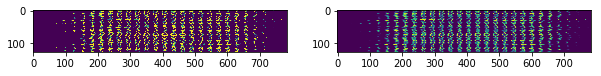

Epoch[4/20], Step [300/469], Reconst Loss: 16326.6846, KL Div: 1416.9691


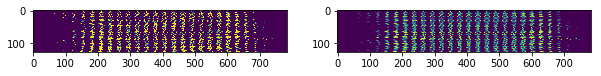

Epoch[4/20], Step [400/469], Reconst Loss: 16787.7578, KL Div: 1447.7523


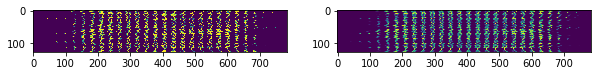

Epoch[5/20], Step [100/469], Reconst Loss: 16019.9941, KL Div: 1373.8563


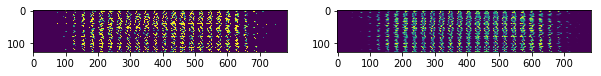

Epoch[5/20], Step [200/469], Reconst Loss: 16368.4629, KL Div: 1460.5647


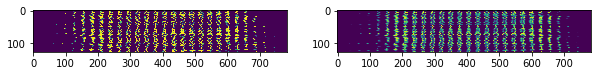

Epoch[5/20], Step [300/469], Reconst Loss: 15510.8125, KL Div: 1368.5372


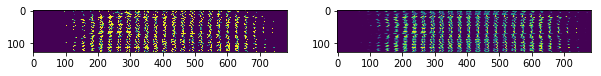

Epoch[5/20], Step [400/469], Reconst Loss: 15557.4678, KL Div: 1345.1230


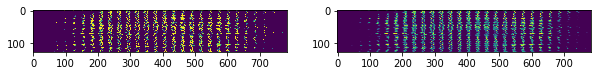

Epoch[6/20], Step [100/469], Reconst Loss: 16238.8477, KL Div: 1332.0991


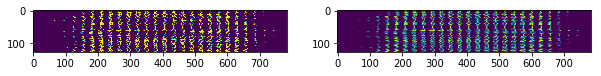

Epoch[6/20], Step [200/469], Reconst Loss: 15988.0234, KL Div: 1437.9995


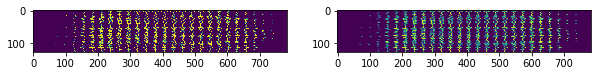

Epoch[6/20], Step [300/469], Reconst Loss: 15613.2559, KL Div: 1428.5450


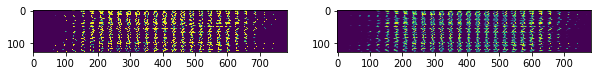

Epoch[6/20], Step [400/469], Reconst Loss: 15860.4053, KL Div: 1426.8475


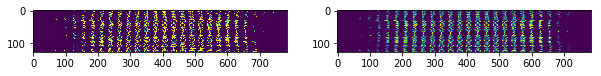

Epoch[7/20], Step [100/469], Reconst Loss: 15965.3896, KL Div: 1334.7767


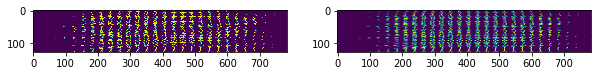

Epoch[7/20], Step [200/469], Reconst Loss: 16464.0039, KL Div: 1355.6588


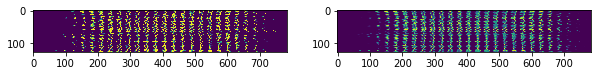

Epoch[7/20], Step [300/469], Reconst Loss: 16356.9033, KL Div: 1368.2478


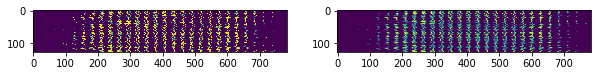

Epoch[7/20], Step [400/469], Reconst Loss: 15326.4512, KL Div: 1357.4877


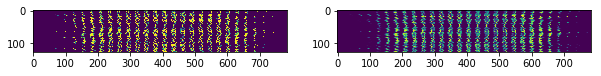

Epoch[8/20], Step [100/469], Reconst Loss: 16387.5293, KL Div: 1373.4658


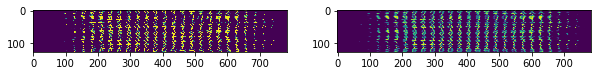

Epoch[8/20], Step [200/469], Reconst Loss: 15940.0449, KL Div: 1335.9956


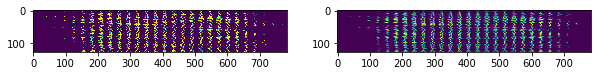

Epoch[8/20], Step [300/469], Reconst Loss: 16164.8389, KL Div: 1332.7759


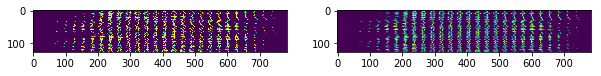

Epoch[8/20], Step [400/469], Reconst Loss: 16391.9668, KL Div: 1369.8044


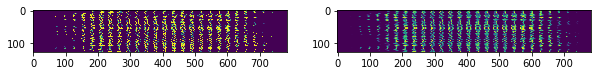

Epoch[9/20], Step [100/469], Reconst Loss: 16295.8994, KL Div: 1355.0790


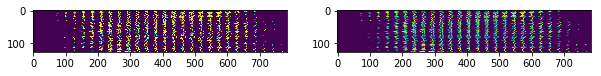

Epoch[9/20], Step [200/469], Reconst Loss: 15484.7471, KL Div: 1360.4019


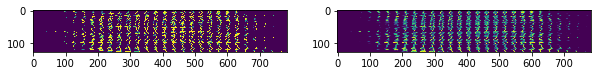

Epoch[9/20], Step [300/469], Reconst Loss: 16758.9121, KL Div: 1395.3129


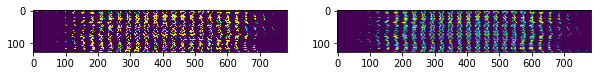

Epoch[9/20], Step [400/469], Reconst Loss: 15750.1104, KL Div: 1384.1633


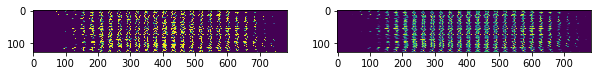

Epoch[10/20], Step [100/469], Reconst Loss: 15580.3281, KL Div: 1370.2506


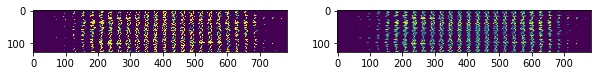

Epoch[10/20], Step [200/469], Reconst Loss: 16159.3848, KL Div: 1303.5459


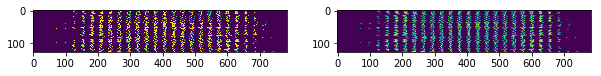

Epoch[10/20], Step [300/469], Reconst Loss: 16420.3438, KL Div: 1402.9631


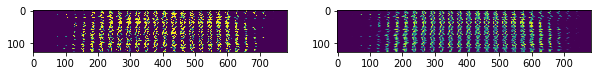

Epoch[10/20], Step [400/469], Reconst Loss: 15483.2539, KL Div: 1423.6511


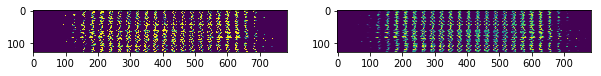

Epoch[11/20], Step [100/469], Reconst Loss: 16130.4980, KL Div: 1381.1038


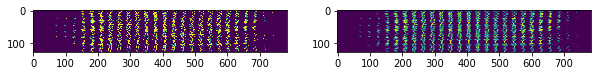

Epoch[11/20], Step [200/469], Reconst Loss: 15446.8496, KL Div: 1349.0461


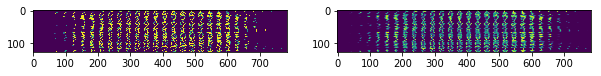

Epoch[11/20], Step [300/469], Reconst Loss: 16164.1406, KL Div: 1347.4781


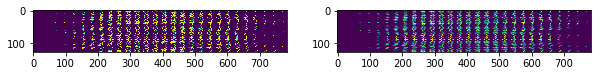

Epoch[11/20], Step [400/469], Reconst Loss: 15982.0166, KL Div: 1365.9116


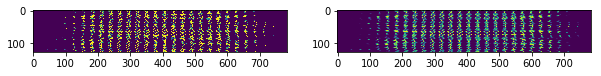

Epoch[12/20], Step [100/469], Reconst Loss: 16120.9805, KL Div: 1420.8252


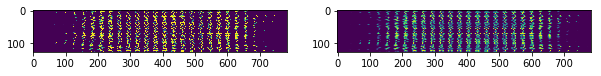

Epoch[12/20], Step [200/469], Reconst Loss: 15854.9121, KL Div: 1389.3307


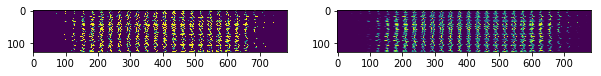

Epoch[12/20], Step [300/469], Reconst Loss: 16323.8486, KL Div: 1345.1941


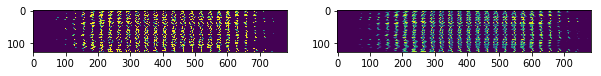

Epoch[12/20], Step [400/469], Reconst Loss: 16144.4658, KL Div: 1386.3237


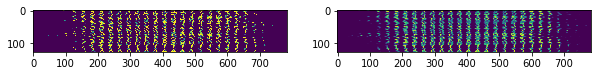

Epoch[13/20], Step [100/469], Reconst Loss: 15670.1162, KL Div: 1353.4885


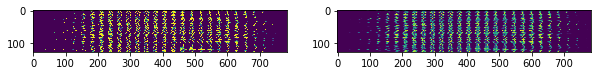

Epoch[13/20], Step [200/469], Reconst Loss: 15133.9736, KL Div: 1437.7732


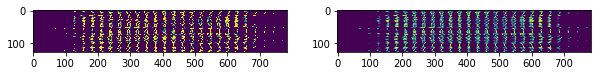

Epoch[13/20], Step [300/469], Reconst Loss: 16269.1533, KL Div: 1393.4675


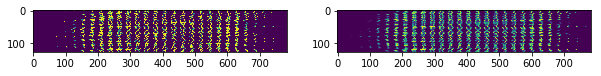

Epoch[13/20], Step [400/469], Reconst Loss: 15455.4473, KL Div: 1343.0077


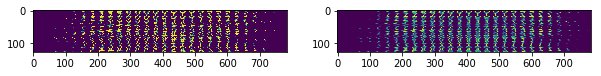

Epoch[14/20], Step [100/469], Reconst Loss: 16421.6484, KL Div: 1302.7964


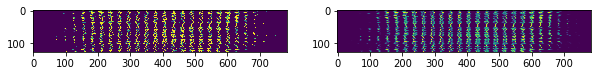

Epoch[14/20], Step [200/469], Reconst Loss: 15002.6797, KL Div: 1314.9178


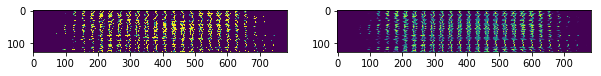

Epoch[14/20], Step [300/469], Reconst Loss: 16105.1133, KL Div: 1384.9094


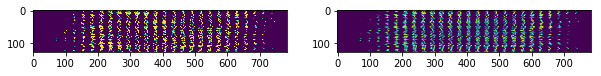

Epoch[14/20], Step [400/469], Reconst Loss: 15703.2373, KL Div: 1341.1191


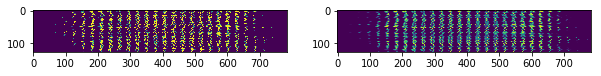

Epoch[15/20], Step [100/469], Reconst Loss: 15342.1035, KL Div: 1387.8387


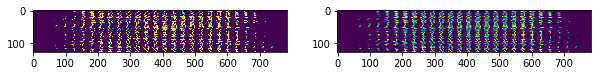

Epoch[15/20], Step [200/469], Reconst Loss: 15463.5176, KL Div: 1356.0461


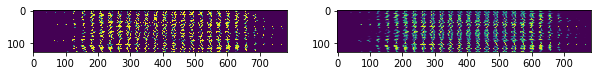

Epoch[15/20], Step [300/469], Reconst Loss: 15499.9580, KL Div: 1350.5538


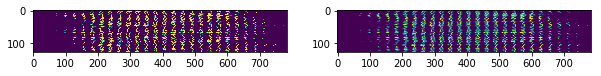

Epoch[15/20], Step [400/469], Reconst Loss: 15852.8799, KL Div: 1387.7808


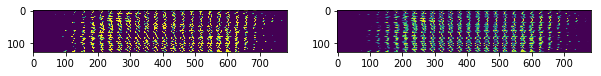

Epoch[16/20], Step [100/469], Reconst Loss: 16044.6807, KL Div: 1327.9672


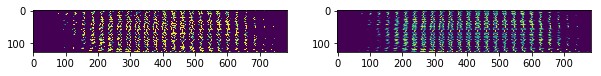

Epoch[16/20], Step [200/469], Reconst Loss: 15492.3018, KL Div: 1337.8048


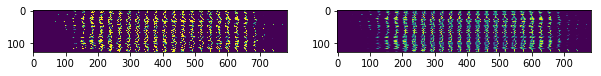

Epoch[16/20], Step [300/469], Reconst Loss: 16013.5801, KL Div: 1321.9989


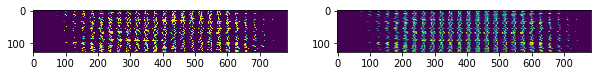

Epoch[16/20], Step [400/469], Reconst Loss: 15852.4883, KL Div: 1376.2708


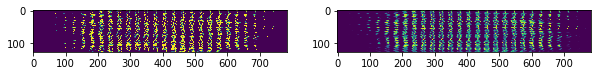

Epoch[17/20], Step [100/469], Reconst Loss: 16725.6836, KL Div: 1377.5924


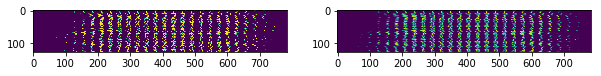

Epoch[17/20], Step [200/469], Reconst Loss: 16020.4648, KL Div: 1431.2764


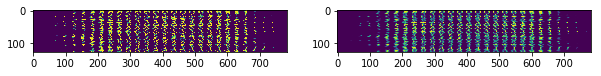

Epoch[17/20], Step [300/469], Reconst Loss: 16347.0771, KL Div: 1390.3101


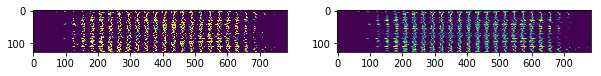

Epoch[17/20], Step [400/469], Reconst Loss: 16264.8691, KL Div: 1404.2659


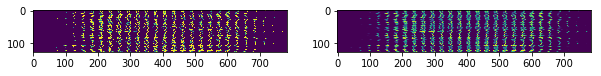

Epoch[18/20], Step [100/469], Reconst Loss: 16156.4668, KL Div: 1335.6685


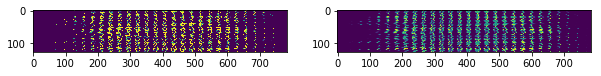

Epoch[18/20], Step [200/469], Reconst Loss: 15835.8701, KL Div: 1360.9855


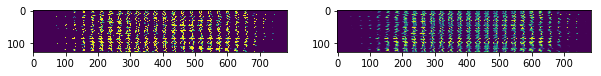

Epoch[18/20], Step [300/469], Reconst Loss: 14812.7715, KL Div: 1387.7034


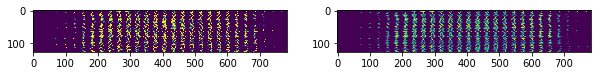

Epoch[18/20], Step [400/469], Reconst Loss: 16109.3877, KL Div: 1347.9106


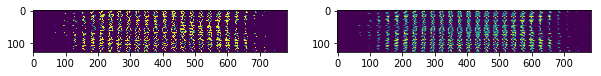

Epoch[19/20], Step [100/469], Reconst Loss: 16365.3086, KL Div: 1397.9709


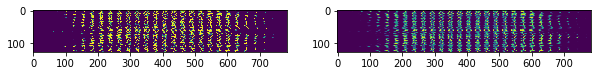

Epoch[19/20], Step [200/469], Reconst Loss: 15658.1201, KL Div: 1360.1979


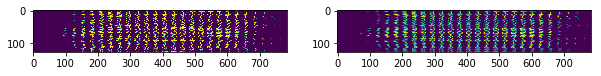

Epoch[19/20], Step [300/469], Reconst Loss: 15958.8076, KL Div: 1375.4136


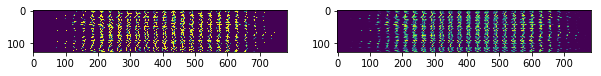

Epoch[19/20], Step [400/469], Reconst Loss: 15757.9629, KL Div: 1369.4512


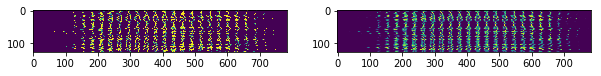

Epoch[20/20], Step [100/469], Reconst Loss: 16397.8828, KL Div: 1422.8658


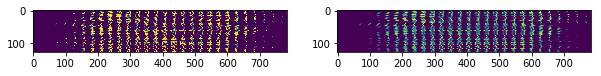

Epoch[20/20], Step [200/469], Reconst Loss: 15777.0645, KL Div: 1364.9037


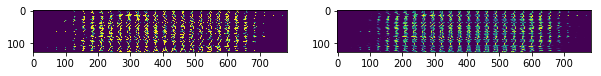

Epoch[20/20], Step [300/469], Reconst Loss: 15819.3232, KL Div: 1346.3462


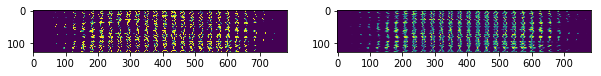

Epoch[20/20], Step [400/469], Reconst Loss: 15430.3174, KL Div: 1403.7529


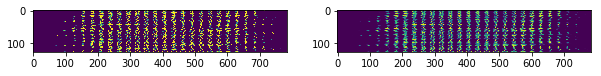

In [30]:
# Start training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        # Added by me - LR Scheduler
        # scheduler.step()
        
        # Forward pass
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))
            fig = plt.figure(figsize=(10,10))
            ax1 = fig.add_subplot(121)
            ax1.imshow(x)
            ax2 = fig.add_subplot(122)
            ax2.imshow(x_reconst.data.numpy())
            plt.show()
    
    with torch.no_grad():
        # Save the sampled images
        z = torch.randn(batch_size, z_dim).to(device)
        out = model.decode(z).view(-1, 1, 28, 28)
        save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

        # Save the reconstructed images
        out, _, _ = model(x)
        x_concat = torch.cat([x.view(-1, 1, 28, 28), out.view(-1, 1, 28, 28)], dim=3)
        save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))


## 4. Cloth Data Loader & Preprocessor

In [120]:
def image_displayer(image):
    image = image/2 + 0.5 #Un-normalizing
    npimg = image.numpy()
    return np.transpose(npimg, (1, 2, 0))

In [121]:
def show_img_sample(x, x_reconst):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(image_displayer(x.view(3, 128, 128)))
    ax2 = fig.add_subplot(122)
    output_img = torch.tensor(x_reconst.data)
    ax2.imshow(output_img.view(3, 128, 128))
    plt.show()

In [132]:
# Data loader
print("Start Data loading...")
dataset = torchvision.datasets.ImageFolder(root='result/',
                                           transform=transforms.Compose([
                                            transforms.Resize(128),       # 한 축을 128로 scaling 하고
                                            transforms.CenterCrop(128),  # square 하게 Crop
                                            transforms.ToTensor(),       # Tensor로 바꾸고 (0~1로 자동으로 normalize)
                                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # -1 ~ 1 사이로 normalize
                                           ])) # (c - m)/s 
# Data preprocessor
data = torch.utils.data.DataLoader(dataset=dataset, batch_size=1, shuffle=True)
print("Done")
    

Start Data loading...
Done


In [133]:
# Hyper-parameters
image_size = 49152
h_dim = 400
z_dim = 200
num_epochs = 10
batch_size = 500
learning_rate = 0.05

In [134]:
# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=49152, h_dim=400, z_dim=200):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return torch.sigmoid(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [5, 9])


Start training on 1688 data images
Epoch[1/10], Step [100/1688], Reconst Loss: 1015600.1875, KL Div: nan
tensor([[4.1560e-39, 4.1560e-39, 4.1560e-39,  ..., 4.1560e-39, 4.1560e-39,
         4.1560e-39]])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


TypeError: Invalid dimensions for image data

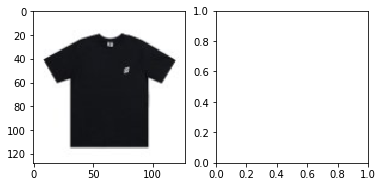

In [135]:
# Start training
print("Start training on %d data images" %(len(data)))
for epoch in range(num_epochs):
    for i, (x, label) in enumerate(data):
        #x = torch.squeeze(x)
        
        ##### TODO: Change the LR Scheduler #####
        scheduler.step()
        
        # Forward
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        reconst_loss = F.binary_cross_entropy(x_reconst, x, reduction='sum')
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backward and optimization
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data), reconst_loss.item(), kl_div.item()))
            print(x_reconst.data)
            show_img_sample(x, x_reconst)
            
    with torch.no_grad():
        # Save the sampled images
        z = torch.randn(batch_size, z_dim).to(device)
        out = model.decode(z).view(-1, 3, 128, 128)
        save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

        # Save the reconstructed images
        out, _, _ = model(x)
        x_concat = torch.cat([x.view(-1, 3, 128, 128), out.view(-1, 3, 128, 128)])
        save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))